#Overview

In this research project, we are going to analyze the Student Test performance data to understand if any socio-economic factors such as gender, parental education level, school's lunch program and student's test preparation have any impact on the test performance. 

As a teacher, it is always important to assess the student performance and various factors that impact their performance, so that they can revise and improve teaching methods. Ongoing assessment of student learning allows teachers to engage in continuous quality improvement of their courses

#Data


The dataset we are going to leverage in this research contains some key information about students demographics data such as (gender, race/ethnicity, parental level of education and lunch program) as well as students test preparation and the test scores from 3 subjects (math, reading and writing). 

Dataset is available for educational research purpose in Kaggle (link included below). This datasets containing 1000 rows and 8 columns has been imported to my git profile for analysis. 

**Link** - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

**NOTE**: This dataset is FICTIONAL! Does not represent real school data.

Currently, the dataset that we're going to use this in this research contains the following features: 

*   gender - indicates students gender (male/female)
*   race/ethnicity - indicates students race/ethnicity
*   parental level of education - indicates the level of education the student's parent has completed
*   lunch - indicates the schools lunch program that student participcates (free/standard)
*   test preparation course - indicates whether the student has completed the test preparation course
*   math score - indicates math score obtained by student
*   reading score - indicates reading score obtained by student
*   writing score - indicates writing score obtained by student

In addition to above, we will derive additional feature listed below to support our research analysis:

*   avg score - average score across all 3 subjects

####Hypothesis testing based on students gender and performance

*   H0 (NULL): There is no difference in students average score based on their gender
*   H1 (Alternate): Significant difference exists in students average scores based on their gender

We'll use t-test to perform our hypothesis testing on above.


In [6]:
# Importing data

import pandas as pd
import math
from scipy import stats
from matplotlib import pyplot as plt

url = 'https://github.com/aparihar21/ThinkFull/blob/main/StudentsPerformance.csv?raw=true'
df = pd.read_csv(url)
print(df.head(5))



   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [7]:
# How large is each group?

print('Female Count: ', len(df[df['gender'] == 'female'])) 

print('Male Count: ', len(df[df['gender'] == 'male'])) 


Female Count:  518
Male Count:  482


In [8]:
# Creating Average Score Column

df['Average Score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

print(df['Average Score'])

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average Score, Length: 1000, dtype: float64


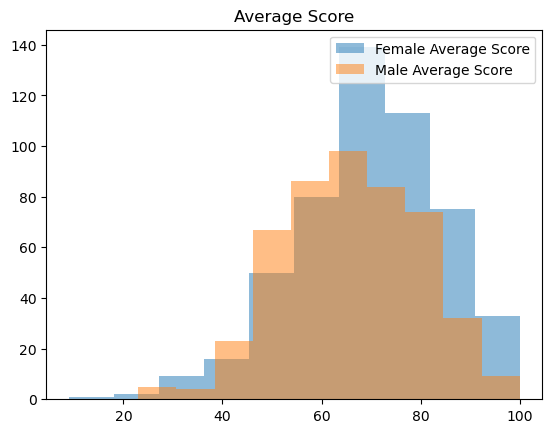

In [19]:
# Check if average score column is Normally distributes


plt.hist(df.loc[df['gender'] == 'female', 'Average Score'], alpha = .5, label = "Female Average Score")
plt.hist(df.loc[df['gender'] == 'male', 'Average Score'], alpha = .5, label = "Male Average Score")
plt.legend(loc="upper right")
plt.title("Average Score")
plt.show()

In [17]:
# Test for skewness and kurtosis

print(stats.describe(df.loc[df['gender'] == 'female', 'Average Score']))
print(stats.describe(df.loc[df['gender'] == 'male', 'Average Score']))

DescribeResult(nobs=518, minmax=(9.0, 100.0), mean=69.56949806949807, variance=211.46421290038313, skewness=-0.45988485596586054, kurtosis=0.5586901418775589)
DescribeResult(nobs=482, minmax=(23.0, 100.0), mean=65.8374827109267, variance=187.65821790510586, skewness=-0.1616736929113303, kurtosis=-0.2748216438554958)


In [18]:
## Performing T Test to see if results have significant differences

stats.ttest_ind(df.loc[df['gender'] == 'female', 'Average Score'], df.loc[df['gender'] == 'male', 'Average Score'])



Ttest_indResult(statistic=4.169913529142, pvalue=3.311973638243664e-05)

In [ ]:
## We can  reject the null from either of these results:

#The test statistic is greater than 1.96.
#The p-value is less than 0.05 

In [27]:
## Confidence Interval


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 2.576 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
get_95_ci(df.loc[df['gender'] == 'female', 'Average Score'], df.loc[df['gender'] == 'male', 'Average Score'])

'The difference in means at the 95% confidence interval (two-tail) is between -6.032549903388392 and -1.431480813754356.'

We can interpret this result as saying that with 99% confidence, average score of female are on average between 6.03 and 1.43 higher than male average score.

Based on this, extra attention can be provided on male students for them to improve their scores, or the school can try to find why male students are performing lesser than female students.

[[Text(0, 0, 'female'), Text(1, 0, 'male')]]

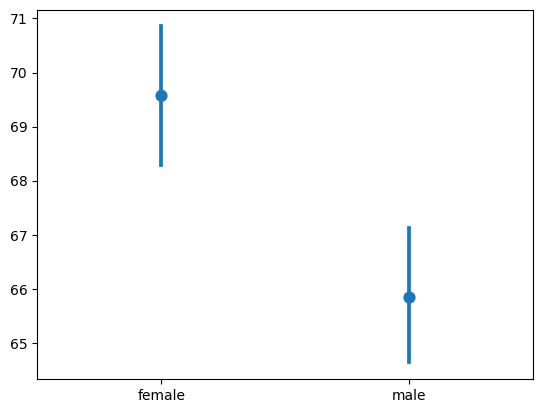

In [26]:
import seaborn as sns

g = sns.pointplot(data=[df.loc[df['gender'] == 'female', 'Average Score'],
                        df.loc[df['gender'] == 'male', 'Average Score']], join=False)
                        
g.set(xticklabels = ['female', 'male'])